In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
import json, yaml
from collections import defaultdict
import tqdm
import matplotlib.pyplot as plt

In [6]:
ROOT = Path().cwd()
LINEAGES = ROOT.joinpath("../lineages/").resolve()
EXAMPLE = ROOT.joinpath("example")

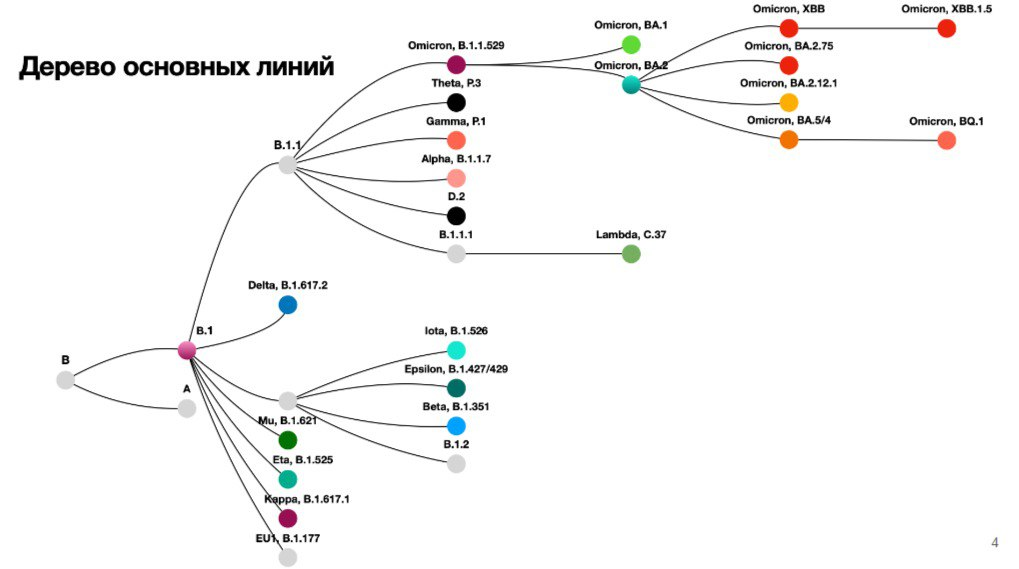

In [ ]:
# + некоторые новые линии

In [ ]:
[i for i in LINEAGES.glob("**/lineage_AY.25.md")]

In [4]:
strain = "XBB.1.16"
to_file = [i for i in LINEAGES.glob(f"**/lineage_{strain}.md")][0]
with open(to_file, 'r') as f:
    md_content = f.read()

In [7]:
roots = {"B": "B",
        "A": "A",
        "B.1": "B.1",
        "B.1.617.2": "B.1.617.2 (Delta)",
        "B.1.621": "B.1.621 (Mu)",
        "B.1.525": "B.1.525 (Eta)",
        "B.1.617.1": "B.1.617.1 (Kappa)",
        "B.1.177": "EU1",
        "B.1.526": "B.1.526 (Iota)",
        "B.1.427": "B.1.427 (Epsilon)",
        "B.1.351": "B.1.351 (Beta)",
        "B.1.2": "B.1.2",
        "B.1.1": "B.1.1",
        "B.1.1.529": "B.1.1.529 (Omicron)",
        "P.3": "P.3 (Theta)",
        "P.1": "P.1 (Gamma)",
        "B.1.1.7": "B.1.1.7 (Alpha)",
        "D.2": "D.2",
        "B.1.1.1": "B.1.1.1",
        "C.37": "C.37 (Lambda)",
        "BA.1": "BA.1 (Omicron)",
        "BA.2": "BA.2 (Omicron)",
        "BA.3": "BA.3 (Omicron)",
        "BA.4": "BA.4 (Omicron)",
        "BA.5": "BA.5 (Omicron)",
        "XBB": "XBB (Omicron)",
        "XBB.1.5": "XBB.1.5 (Omicron)",
        "XBB.1.16": "XBB.1.16 (Omicron)",
        "XBB.1.9.1": "XBB.1.9.1 (Omicron)",
        "XBB.2.3": "XBB.2.3 (Omicron)",
        "BA.2.75": "BA.2.75 (Omicron)",
        "BA.2.12.1": "BA.2.12.1 (Omicron)",
        "BQ.1": "BQ.1 (Omicron)",
        "XBB.2.3": "XBB.2.3 (Omicron)",
        "EG.5": "EG.5 (Omicron)",
        "BA.2.86": "BA.2.86 (Omicron)",
        "JN.1": "JN.1 (Omicron)",
        "Other": "Other"}

In [8]:
default_dict = defaultdict(list)

for key, value in roots.items():
    default_dict[key].append(value)

In [9]:
def open_md(strain):
    to_file = [i for i in LINEAGES.glob(f"**/lineage_{strain}.md")]
    if len(to_file) == 0:
        print(f'Линия {strain} неизвестна')
        return 0
    if len(to_file) != 1:
        print(f"Найдено два файла для {strain}")
    with open(to_file[0], 'r') as f:
        md_content = f.read()    
    metadata_dict = {}
    # Проходим по каждой строке и добавляем ее в словарь
    for line in md_content.split('\n')[1:-2]:
        key, value = line.split(': ', 1)
        metadata_dict[key] = value
    return metadata_dict

In [12]:
open_md("XBB.1")

Найдено два файла для XBB.1


{'permalink': '/lineages/lineage_XBB.1.html',
 'layout': 'lineage_page',
 'title': 'Lineage XBB.1',
 'redirect_to': '../lineage.html?lineage=XBB.1',
 'lineage': 'XBB.1',
 'parent': 'XBB',
 'children': "['EG.2', 'EG.2.2', 'EG.4', 'EG.5', 'EG.5.1', 'EG.5.1.1', 'EG.5.1.2', 'EG.5.1.3', 'EG.5.1.4', 'EG.5.1.5', 'EG.5.1.6', 'EG.5.1.7', 'EG.5.1.8', 'EG.5.1.9', 'EG.5.1.11', 'EG.5.1.12', 'EG.5.1.13', 'EG.5.1.14', 'EG.5.1.15', 'EG.5.1.16', 'EG.5.1.17', 'EG.5.1.18', 'EG.5.1.19', 'EG.5.2', 'EG.5.2.1', 'EG.5.2.2', 'EG.6.1', 'EG.6.1.1', 'EG.6.1.2', 'EG.7', 'EG.10', 'EG.10.1', 'EG.10.1.1', 'EU.1.1', 'FD.1.1', 'FD.5.1', 'FE.1.1.5', 'FE.1.2', 'FL.1.5', 'FL.1.5.1', 'FL.1.5.2', 'FL.1.8', 'FL.3.1', 'FL.3.2', 'FL.4', 'FL.5', 'FL.13', 'FL.13.4', 'FL.13.4.1', 'FL.13.5', 'FL.15', 'FL.15.1', 'FL.15.1.1', 'FL.15.4', 'FL.16', 'FL.20', 'FL.20.1', 'FL.20.2', 'FL.21', 'FL.22', 'FL.24', 'FL.24.1', 'FL.25', 'FL.33', 'FL.36', 'FT.3.1', 'FT.3.1.1', 'FU.1', 'FU.2', 'FU.2.1', 'FW.1', 'FW.1.1.1', 'FY.1.2', 'FY.1.2.1', 'FY.

In [13]:
def find_strain_root(strain):
    metadata_dict = open_md(strain)
    if metadata_dict == 0:
        return strain
    if type(metadata_dict) != dict:
        raise KeyError(f'Линия {strain} неизвестна')
    if "parent" in metadata_dict.keys() and strain not in roots.keys(): 
        res = metadata_dict["parent"]
        return find_strain_root(res)
    else:
        return strain

In [16]:
roots[find_strain_root("XBB.1")]

Найдено два файла для XBB.1
Найдено два файла для XBB


'XBB (Omicron)'

In [17]:
roots[find_strain_root("XBB.1")]

Найдено два файла для XBB.1
Найдено два файла для XBB


'XBB (Omicron)'

In [20]:
find_strain_root("XBB.1")

Найдено два файла для XBB.1
Найдено два файла для XBB


'XBB'

In [21]:
def final_linage_name(name):
    res = find_strain_root(name)
    if res in roots:
        res = default_dict[res]
    else:
        res = default_dict['Other']
    return res[0]

In [23]:
final_linage_name("XBB.1.16")

Найдено два файла для XBB.1.16


'XBB.1.16 (Omicron)'

## Example

In [310]:
%%time
df = pd.read_excel(EXAMPLE / "ежедневный_расширенный_отчёт_2024-04-08 16-00-01.xlsx")
df

CPU times: user 4min 49s, sys: 1.77 s, total: 4min 51s
Wall time: 4min 50s


,#,id последовательности,Загрузил,Загрузил образец,Название образца,Тип образца,Область секвенирования,Место забора,Место забора. Страна,Место забора. Регион,...,Загрузил сиквенс,Панголин комментарий,Заключение,Заключение комментарий,Штрихкод,Дата отправки образца,Дата принятия образца,Дата предварительного результата,Дата секвенирования,Валидность
0,1,crie000001,crie,ЦНИИ Эпидемиологии,7602069812,Первичный,Полный геном,Россия/Архангельская область/Архангельск,Россия,Архангельская область,...,ЦНИИ Эпидемиологии,Assigned from designation hash.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Валидный
1,2,crie000002,crie,ЦНИИ Эпидемиологии,7602093151,Первичный,Полный геном,Россия/Архангельская область/Архангельск,Россия,Архангельская область,...,ЦНИИ Эпидемиологии,Assigned from designation hash.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Валидный
2,3,crie000003,crie,ЦНИИ Эпидемиологии,7602087210,Первичный,Полный геном,Россия/Архангельская область/Архангельск,Россия,Архангельская область,...,ЦНИИ Эпидемиологии,Assigned from designation hash.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Валидный
3,5,hnii000001,hniiem,ФБУН «Хабаровский НИИ»,22616,Первичный,Фрагмент генома (S-белок),Россия/Хабаровский край/Хабаровск,Россия,Хабаровский край,...,ФБУН «Хабаровский НИИ»,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Валидный
4,6,hnii000002,hniiem,ФБУН «Хабаровский НИИ»,22617,Первичный,Фрагмент генома (S-белок),Россия/Хабаровский край/Хабаровск,Россия,Хабаровский край,...,ФБУН «Хабаровский НИИ»,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Валидный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320147,517683,crie064501,crie_peresadina,ЦНИИ Эпидемиологии,L221V0001_7896822215,Первичный,Полный геном,Россия/Москва,Россия,г Москва,...,ЦНИИ Эпидемиологии,Usher placements: JN.1(1/1),NaN,NaN,NaN,NaN,NaN,NaN,2024-04-08 12:33:05,Валидный
320148,517684,crie064502,crie_peresadina,ЦНИИ Эпидемиологии,L231A0047_7897352456,Первичный,Полный геном,Россия/Московская область,Россия,Московская область,...,ЦНИИ Эпидемиологии,Usher placements: JN.1(1/1),NaN,NaN,NaN,NaN,NaN,NaN,2024-04-08 12:33:05,Валидный
320149,517685,crie064503,crie_peresadina,ЦНИИ Эпидемиологии,L231T0023_7896558355,Первичный,Полный геном,Россия/Московская область,Россия,Московская область,...,ЦНИИ Эпидемиологии,Usher placements: JN.1(1/1),NaN,NaN,NaN,NaN,NaN,NaN,2024-04-08 12:33:06,Валидный
320150,517686,crie064504,crie_peresadina,ЦНИИ Эпидемиологии,L231T0009_7896378879,Первичный,Полный геном,Россия/Московская область,Россия,Московская область,...,ЦНИИ Эпидемиологии,Usher placements: JN.1(1/1),NaN,NaN,NaN,NaN,NaN,NaN,2024-04-08 12:33:06,Валидный


In [311]:
df.shape

(320152, 69)

In [335]:
df.columns

Index(['#', 'id последовательности', 'Загрузил', 'Загрузил образец',
       'Название образца', 'Тип образца', 'Область секвенирования',
       'Место забора', 'Место забора. Страна', 'Место забора. Регион',
       'Место забора. Код региона', 'Место забора. Город', 'Дата забора',
       'Пол', 'Возраст', 'Поражение лёгких', 'Симптомы', 'Исход',
       'Сопутствующие заболевания', 'Подозрение на повторное заболевание',
       'Вакцинация', 'Дата вакцинации', '*Дата 2-й вакцинации',
       '*Дата 3-й вакцинации', 'Путешествовал', 'Дата возвращения',
       'Откуда прибыл', 'Откуда прибыл. Страна', 'Откуда прибыл. Регион',
       'Откуда прибыл. Код региона', 'Откуда прибыл. Город', 'б/м',
       'ct на pcr тесте', 'тест система', 'Метод подготовки библиотек',
       'Технология/платформа секвенирования', 'Метод сборки генома',
       'Среднее покрытие', 'Авторы', 'Комментарии', 'GISAID ID',
       '*Выполнили забор б/м', '*Полное название сиквенса', '*ID образца',
       'Социальный ста

In [313]:
df = df[df["Валидность"] == "Валидный"]

In [314]:
df.shape

(300374, 69)

In [315]:
df["id последовательности"] = np.asarray(["exmpl"+str(i) for i in range(df.shape[0])])

/tmp/ipykernel_138049/108333754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id последовательности"] = np.asarray(["exmpl"+str(i) for i in range(df.shape[0])])


In [316]:
df[["Генетический вариант(Скрипт VGARus)", "Pangolin"]] = df[["Генетический вариант(Скрипт VGARus)", "Pangolin"]].astype(str) 

/tmp/ipykernel_138049/2050758251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Генетический вариант(Скрипт VGARus)", "Pangolin"]] = df[["Генетический вариант(Скрипт VGARus)", "Pangolin"]].astype(str)


In [317]:
df["Pangolin"] = df["Pangolin"].apply(lambda x: x.split(" ")[0])

/tmp/ipykernel_138049/3270391041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pangolin"] = df["Pangolin"].apply(lambda x: x.split(" ")[0])


In [318]:
mask = df["Pangolin"].isin(["nan"])
df = df[~mask]

In [326]:
df[["id последовательности", "Дата забора", "Pangolin"]].to_csv(EXAMPLE / 'full_report.tsv', sep="\t", index=False)

In [10]:
sars_c_2_df = pd.read_csv(EXAMPLE / 'full_report.tsv', sep="\t")

In [11]:
sars_c_2_df

,id последовательности,Дата забора,Pangolin
0,exmpl0,2020-12-24,B.1.1.141
1,exmpl1,2020-12-28,B.1.1
2,exmpl2,2020-12-28,B.1.1
3,exmpl40,2020-03-27,B.1
4,exmpl41,2020-11-06,B.1.1
...,...,...,...
188492,exmpl300369,2024-03-29,JN.1
188493,exmpl300370,2024-04-01,JN.1
188494,exmpl300371,2024-03-28,JN.1
188495,exmpl300372,2024-03-27,JN.1


sars_c_2_df["Pangolin_collapse"] = sars_c_2_df["Pangolin"].apply(lambda x: default_dict[find_strain_root(x)])

In [16]:
collapse_mapping = {}
for i in sars_c_2_df["Pangolin"].unique():
    print(i)
    collapsed_res = default_dict[find_strain_root(i)]
    if len(collapsed_res) != 0:
        collapse_mapping[i] = collapsed_res[0]
    else:
        collapse_mapping[i] = "Other"

B.1.1.141
Линия B.1.1.141 неизвестна
B.1.1
B.1
B.1.1.397
Линия B.1.1.397 неизвестна
B.1.1.349
Линия B.1.1.349 неизвестна
B.1.1.373
Линия B.1.1.373 неизвестна
B.1.1.317
Линия B.1.1.317 неизвестна
B.1.1.163
Линия B.1.1.163 неизвестна
B.1.1.372
Линия B.1.1.372 неизвестна
B.1.1.336
Линия B.1.1.336 неизвестна
B.1.1.435
Линия B.1.1.435 неизвестна
B.1.1.294
Линия B.1.1.294 неизвестна
B.1.1.274
Линия B.1.1.274 неизвестна
B.1.1.243
Линия B.1.1.243 неизвестна
B.1.264.1
Линия B.1.264.1 неизвестна
B.1.243
Линия B.1.243 неизвестна
B.1.1.449
Линия B.1.1.449 неизвестна
B.1.1.129
Линия B.1.1.129 неизвестна
B.1.1.204
Линия B.1.1.204 неизвестна
B
B.1.1.83
Линия B.1.1.83 неизвестна
B.1.1.10
Линия B.1.1.10 неизвестна
B.1.179
Линия B.1.179 неизвестна
B.1.173
Линия B.1.173 неизвестна
B.1.1.364
Линия B.1.1.364 неизвестна
B.1.1.117
Линия B.1.1.117 неизвестна
B.1.199
Линия B.1.199 неизвестна
B.1.1.208
Линия B.1.1.208 неизвестна
B.1.1.28
B.1.1.57
Линия B.1.1.57 неизвестна
B.1.78
Линия B.1.78 неизвестна
B.1.1.42

In [17]:
len(collapse_mapping)

1004

In [18]:
sars_c_2_df["Pangolin_collapse"] = sars_c_2_df["Pangolin"].apply(lambda x: collapse_mapping[x])

In [ ]:
sars_c_2_df

In [ ]:
sars_c_2_df

In [19]:
sars_c_2_df[["id последовательности", "Дата забора", "Pangolin"]].sample(frac=0.01, random_state=31).reset_index(drop=True).to_csv(EXAMPLE / "subset_report.tsv", sep="\t")

In [20]:
sars_c_2_df[sars_c_2_df["Дата забора"] > "2023-01-01"]["Pangolin_collapse"].isin(["Other"]).sum()

3725

In [66]:
mask = sars_c_2_df[sars_c_2_df["Дата забора"] > "2023-01-01"]["Pangolin_collapse"].isin(["Other"])
sars_c_2_df[sars_c_2_df["Дата забора"] > "2023-01-01"][mask]

,id последовательности,Дата забора,Pangolin,Pangolin_collapse
129534,exmpl217746,2023-01-04,CL.1.2,Other
129542,exmpl217754,2023-01-04,XAZ,Other
129544,exmpl217756,2023-01-04,BN.1.3,Other
129545,exmpl217757,2023-01-04,BN.1.3,Other
129550,exmpl217764,2023-01-04,CL.1.2,Other
...,...,...,...,...
188394,exmpl300271,2023-12-18,HK.30,Other
188395,exmpl300272,2023-12-18,HK.30,Other
188414,exmpl300291,2024-02-07,JE.1.1.1,Other
188430,exmpl300307,2024-02-05,HK.3.1,Other


In [67]:
sars_c_2_df[sars_c_2_df["Дата забора"] > "2022-01-01"]["Pangolin_collapse"].isin(["Other"]).sum()

13950

In [68]:
sars_c_2_df[sars_c_2_df["Дата забора"] > "2021-01-01"]["Pangolin_collapse"].isin(["Other"]).sum()

19255

In [69]:
sars_c_2_df[sars_c_2_df["Дата забора"] > "2019-01-01"]["Pangolin_collapse"].isin(["Other"]).sum()

21617

In [60]:
sars_c_2_df["Pangolin_collapse"].unique().shape

(30,)

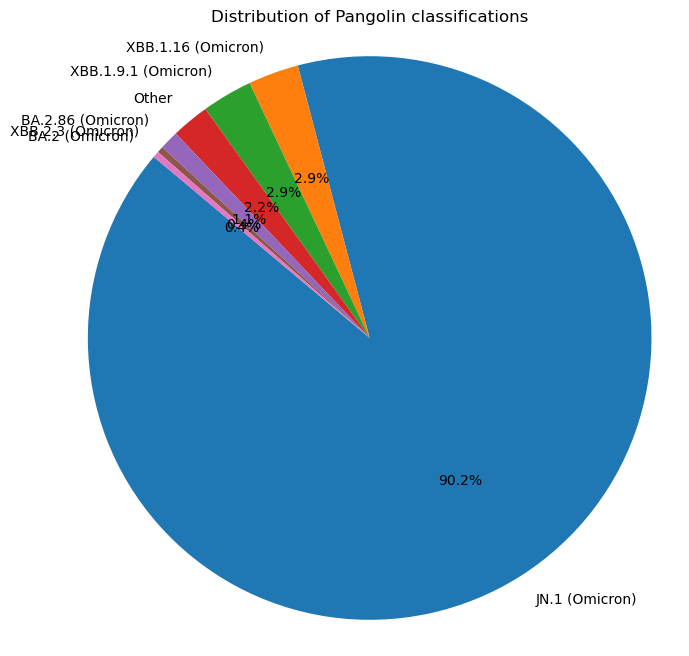

In [70]:
counts = sars_c_2_df[sars_c_2_df["Дата забора"] > "2024-03-18"]['Pangolin_collapse'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Pangolin classifications')

# Отображение диаграммы
plt.show()

In [104]:
from pathlib import Path
from argparse import ArgumentParser

roots = {#Pangolin
        "B": "B",
        "A": "A",
        "B.1": "B.1",
        "B.1.617.2": "B.1.617.2 (Delta)",
        "B.1.621": "B.1.621 (Mu)",
        "B.1.525": "B.1.525 (Eta)",
        "B.1.617.1": "B.1.617.1 (Kappa)",
        "B.1.177": "EU1",
        "B.1.526": "B.1.526 (Iota)",
        "B.1.427": "B.1.427 (Epsilon)",
        "B.1.351": "B.1.351 (Beta)",
        "B.1.2": "B.1.2",
        "B.1.1": "B.1.1",
        "B.1.1.529": "B.1.1.529 (Omicron)",
        "P.3": "P.3 (Theta)",
        "P.1": "P.1 (Gamma)",
        "B.1.1.7": "B.1.1.7 (Alpha)",
        "D.2": "D.2",
        "B.1.1.1": "B.1.1.1",
        "C.37": "C.37 (Lambda)",
        "BA.1": "BA.1 (Omicron)",
        "BA.2": "BA.2 (Omicron)",
        "BA.3": "BA.3 (Omicron)",
        "BA.4": "BA.4 (Omicron)",
        "BA.5": "BA.5 (Omicron)",
        "XBB": "XBB (Omicron)",
        "XBB.1.5": "XBB.1.5 (Omicron)",
        "XBB.1.16": "XBB.1.16 (Omicron)",
        "XBB.1.9.1": "XBB.1.9.1 (Omicron)",
        "XBB.2.3": "XBB.2.3 (Omicron)",
        "BA.2.75": "BA.2.75 (Omicron)",
        "BA.2.12.1": "BA.2.12.1 (Omicron)",
        "BQ.1": "BQ.1 (Omicron)",
        "XBB.2.3": "XBB.2.3 (Omicron)",
        "EG.5": "EG.5 (Omicron)",
        "BA.2.86": "BA.2.86 (Omicron)",
        "JN.1": "JN.1 (Omicron)",
        #V-TRACE 
        "B.1.1.523": "B.1.1.523 (Omicron)",
        "AT.1": "AT.1",
        "BA.2.10.1": "BA.2.10.1 (Omicron)",
        "BA.4/BA.5": "BA.4/BA.5 (Omicron)",
        "XBB.1.1": "XBB.1.1 (Omicron)",
        "XBB.1.5/XBB.1.9.1": "XBB.1.5/XBB.1.9.1 (Omicron)",
        "EG.5.1": "EG.5.1 (Omicron)",
        "BF.5" : "BF.5 (Omicron)",
        "BF.7" : "BF.7 (Omicron)",
        "CL.1" : "CL.1 (Omicron)",

        "Other": "Other"}


def open_md(strain):
    to_file = [i for i in PHYLO.glob(f"**/lineage_{strain}.md")]
    if len(to_file) == 0:
        #print(f'Линия {strain} неизвестна')
        return 0
    #if len(to_file) != 1:
    #    print(f"Найдено два файла для {strain}")
    with open(to_file[0], 'r') as f:
        md_content = f.read()    
    metadata_dict = {}
    # Проходим по каждой строке и добавляем ее в словарь
    for line in md_content.split('\n')[1:-2]:
        key, value = line.split(': ', 1)
        metadata_dict[key] = value
    return metadata_dict

def find_strain_root(strain):
    metadata_dict = open_md(strain)
    if metadata_dict == 0:
        return strain
    if type(metadata_dict) != dict:
        raise KeyError(f'Линия {strain} неизвестна')
    if "parent" in metadata_dict.keys() and strain not in roots.keys(): 
        res = metadata_dict["parent"]
        return find_strain_root(res)
    else:
        return strain
    
def final_linage_name(name):
    #name.replace("пред. ", "")
    name = name.split(" ")[0]
    res = find_strain_root(name)
    if res in roots:
        res = roots[res]
    else:
        res = roots['Other']
    return res

In [47]:
INPUT = "XBB.1"

ROOT = Path().cwd()
PHYLO = Path("../lineages").resolve()

collapsed_name = final_linage_name(INPUT)
print(collapsed_name)

XBB (Omicron)


In [127]:
final_linage_name("EG.5")

'EG.5 (Omicron)'

In [126]:
open_md("EG.5")

{'permalink': '/lineages/lineage_EG.5.html',
 'layout': 'lineage_page',
 'title': 'Lineage EG.5',
 'redirect_to': '../lineage.html?lineage=EG.5',
 'lineage': 'EG.5',
 'parent': 'XBB.1.9.2',
 'children': "['EG.5', 'EG.5.1', 'EG.5.1.1', 'EG.5.1.2', 'EG.5.1.3', 'EG.5.1.4', 'EG.5.1.5', 'EG.5.1.6', 'EG.5.1.7', 'EG.5.1.8', 'EG.5.1.9', 'EG.5.1.11', 'EG.5.1.12', 'EG.5.1.13', 'EG.5.1.14', 'EG.5.1.15', 'EG.5.1.16', 'EG.5.1.17', 'EG.5.1.18', 'EG.5.1.19', 'EG.5.2', 'EG.5.2.1', 'EG.5.2.2']"}

In [80]:
to_files = [i for i in PHYLO.glob(f"**/lineage*.md")]

In [112]:
root_count = []
for to_file in PHYLO.glob(f"**/lineage*.md"):
    metadata_dict = open_md(to_file.stem.split("lineage_")[1])
    if "parent" not in metadata_dict.keys() or len(metadata_dict["parent"]) == 0:
        root_count.append(to_file.stem.split("_")[1])
roots_add = {i: i+" (Omicron)" for i in root_count}

In [121]:
def create_roots_add(path_to_lineage):
    root_count = []
    for to_file in path_to_lineage.glob(f"**/lineage*.md"):
        metadata_dict = open_md(to_file.stem.split("lineage_")[1])
        if "parent" not in metadata_dict.keys() or len(metadata_dict["parent"]) == 0:
            root_count.append(to_file.stem.split("_")[1])
    roots_add = {i: i+" (Omicron)" for i in root_count}
    return roots_add

In [ ]:
        "EG.5.1": "EG.5.1 (Omicron)",
        "BF.5" : "BF.5 (Omicron)",
        "BF.7" : "BF.7 (Omicron)",
        "CL.1" : "CL.1 (Omicron

In [123]:
create_roots_add(path_to_lineage=PHYLO)

{'BE.1': 'BE.1 (Omicron)',
 'BE.13': 'BE.13 (Omicron)',
 'BE.7': 'BE.7 (Omicron)',
 'BE.8': 'BE.8 (Omicron)',
 'BE.9': 'BE.9 (Omicron)',
 'BF.1': 'BF.1 (Omicron)',
 'BF.11': 'BF.11 (Omicron)',
 'BF.13': 'BF.13 (Omicron)',
 'BF.14': 'BF.14 (Omicron)',
 'BF.16': 'BF.16 (Omicron)',
 'BF.2': 'BF.2 (Omicron)',
 'BF.21': 'BF.21 (Omicron)',
 'BF.25': 'BF.25 (Omicron)',
 'BF.26': 'BF.26 (Omicron)',
 'BF.27': 'BF.27 (Omicron)',
 'BF.28': 'BF.28 (Omicron)',
 'BF.29': 'BF.29 (Omicron)',
 'BF.31': 'BF.31 (Omicron)',
 'BF.37': 'BF.37 (Omicron)',
 'BF.38': 'BF.38 (Omicron)',
 'BF.40': 'BF.40 (Omicron)',
 'BF.42': 'BF.42 (Omicron)',
 'BF.5': 'BF.5 (Omicron)',
 'BF.7': 'BF.7 (Omicron)',
 'BF.9': 'BF.9 (Omicron)',
 'BG.2': 'BG.2 (Omicron)',
 'BK.1': 'BK.1 (Omicron)',
 'BL.1': 'BL.1 (Omicron)',
 'BL.2': 'BL.2 (Omicron)',
 'BL.6': 'BL.6 (Omicron)',
 'BN.1': 'BN.1 (Omicron)',
 'BN.6': 'BN.6 (Omicron)',
 'BQ.1': 'BQ.1 (Omicron)',
 'BR.1': 'BR.1 (Omicron)',
 'BR.2': 'BR.2 (Omicron)',
 'BR.3': 'BR.3 (Omicron

In [122]:
len(root_count)

350

In [114]:
set(root_count) & set(roots.keys())

{'BF.5', 'BF.7', 'BQ.1', 'CL.1', 'JN.1', 'XBB'}

{'BE.1': 'BE.1 (Omicron)',
 'BE.13': 'BE.13 (Omicron)',
 'BE.7': 'BE.7 (Omicron)',
 'BE.8': 'BE.8 (Omicron)',
 'BE.9': 'BE.9 (Omicron)',
 'BF.1': 'BF.1 (Omicron)',
 'BF.11': 'BF.11 (Omicron)',
 'BF.13': 'BF.13 (Omicron)',
 'BF.14': 'BF.14 (Omicron)',
 'BF.16': 'BF.16 (Omicron)',
 'BF.2': 'BF.2 (Omicron)',
 'BF.21': 'BF.21 (Omicron)',
 'BF.25': 'BF.25 (Omicron)',
 'BF.26': 'BF.26 (Omicron)',
 'BF.27': 'BF.27 (Omicron)',
 'BF.28': 'BF.28 (Omicron)',
 'BF.29': 'BF.29 (Omicron)',
 'BF.31': 'BF.31 (Omicron)',
 'BF.37': 'BF.37 (Omicron)',
 'BF.38': 'BF.38 (Omicron)',
 'BF.40': 'BF.40 (Omicron)',
 'BF.42': 'BF.42 (Omicron)',
 'BF.5': 'BF.5 (Omicron)',
 'BF.7': 'BF.7 (Omicron)',
 'BF.9': 'BF.9 (Omicron)',
 'BG.2': 'BG.2 (Omicron)',
 'BK.1': 'BK.1 (Omicron)',
 'BL.1': 'BL.1 (Omicron)',
 'BL.2': 'BL.2 (Omicron)',
 'BL.6': 'BL.6 (Omicron)',
 'BN.1': 'BN.1 (Omicron)',
 'BN.6': 'BN.6 (Omicron)',
 'BQ.1': 'BQ.1 (Omicron)',
 'BR.1': 'BR.1 (Omicron)',
 'BR.2': 'BR.2 (Omicron)',
 'BR.3': 'BR.3 (Omicron

In [115]:
res_other = [final_linage_name(i) for i in root_count]

In [116]:
res_other

['Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'BF.5 (Omicron)',
 'BF.7 (Omicron)',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'BQ.1 (Omicron)',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'CL.1 (Omicron)',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Ot